In [1]:
%load_ext autoreload

%reload_ext autoreload

In [1]:
import pricing_ai
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
import warnings
import pandas as pd
import calendar
import pydata_google_auth
import matplotlib.pyplot as plt
from google.cloud import bigquery
warnings.simplefilter('ignore')

credentials = pydata_google_auth.get_user_credentials(
    ['https://www.googleapis.com/auth/bigquery'],
)

def print_shape(df):
    print(df.shape)

def get_cilent():
    credentials = pydata_google_auth.get_user_credentials(
    ['https://www.googleapis.com/auth/bigquery'],
    )
    client = bigquery.Client(credentials=credentials, project='ps-data-analytics-platform')
    return client

def get_sql(sql_path: str='sql/contract.sql'):
    with open (sql_path, 'r') as sql:
        sql = sql.read()
    return sql

def to_datetime(df: pd.DataFrame, col: str=None):
    if not col:
        col = 'delete_date'
    df[col] = pd.to_datetime(df[col], errors='coerce')
    df = df.dropna(subset=col)
    df = df.sort_values(by=col, ascending=False).reset_index(drop=True)
    return df

def get_df(sql, client):
    df = client.query(sql).to_dataframe()
    return df

def extract_yyyy(df, datetime_col: str='delete_date'):
    df['year'] = df[datetime_col].dt.year
    return df

def extract_mm(df, datetime_col: str='delete_date'):
    df['month'] = df[datetime_col].dt.month
    return df

def extract_dd(df, datetime_col: str='delete_date'):
    df['day'] = df[datetime_col].dt.day
    return df

def extract_dayofweek(df, datetime_col: str='delete_date'):
    df['dayofweek'] = df[datetime_col].dt.day_of_week.apply(lambda dayofweek: calendar.day_name[dayofweek])
    df['dayofweek'] = df[datetime_col].dt.day_of_week.astype(str) + '.' +df['dayofweek']
    return df

In [3]:
client = pricing_ai.get_cilent()
sql = pricing_ai.get_sql(sql_path='sql/first_pub.sql')
df = pricing_ai.get_df(sql, client)

In [4]:
df = pricing_ai.to_datetime(df, col='min_date')
df = pricing_ai.extract_yyyy(df,datetime_col='min_date')
df = pricing_ai.extract_mm(df,datetime_col='min_date')
df = pricing_ai.extract_dd(df,datetime_col='min_date')
df = pricing_ai.extract_dayofweek(df,datetime_col='min_date')

In [7]:
df

,stock_id,min_date,half_year_fig,year,month,day,dayofweek
0,0903291A30220101W004,2022-01-01,0,2022,1,1,5.Saturday
1,0509555A30220101W004,2022-01-01,0,2022,1,1,5.Saturday
2,1101323A20211228D008,2022-01-01,0,2022,1,1,5.Saturday
3,0206422A30220101W002,2022-01-01,0,2022,1,1,5.Saturday
4,0506352A20220101J001,2022-01-01,0,2022,1,1,5.Saturday
...,...,...,...,...,...,...,...
5355035,1300156A30190826W001,2019-12-31,0,2019,12,31,1.Tuesday
5355036,0801134A20191030S002,2019-12-31,0,2019,12,31,1.Tuesday
5355037,0506441A20190927J001,2019-12-31,0,2019,12,31,1.Tuesday
5355038,1040085A30190924W003,2019-12-31,0,2019,12,31,1.Tuesday


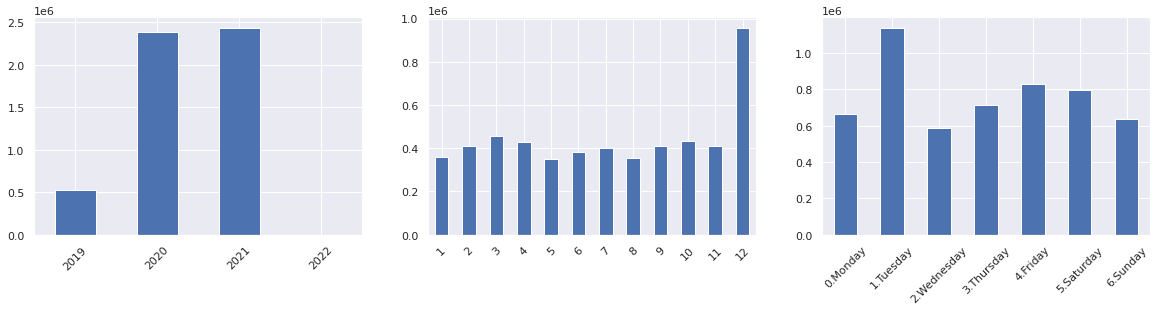

In [6]:
fig, axes = plt.subplots(1,3, figsize=(20, 4))
df.year.value_counts().sort_index().plot.bar(ax=axes[0])
df.month.value_counts().sort_index().plot.bar(ax=axes[1])
df.dayofweek.value_counts().sort_index().plot.bar(ax=axes[2])

for ax in axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
        
plt.show()

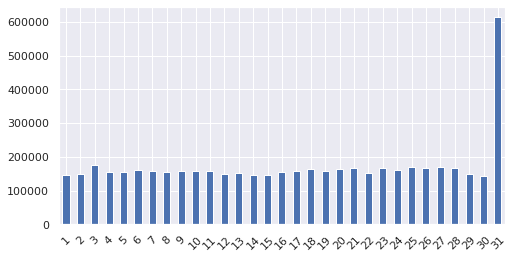

In [8]:
fig, axes = plt.subplots(1,1, figsize=(8, 4))
df.day.value_counts().sort_index().plot.bar(ax=axes)

for tick in axes.get_xticklabels():
    tick.set_rotation(45)

In [9]:
df

,stock_id,min_date,half_year_fig
0,0708174A30200924W001,2020-09-24,0
1,0570521A20211105G001,2021-11-05,0
2,0507808A20211211J003,2021-12-11,0
3,0310028A30200424W001,2020-04-24,0
4,0560342A30200311W002,2020-03-11,0
...,...,...,...
5355036,0400108A20190817S004,2019-12-31,0
5355037,0206645A30191128W003,2019-12-31,0
5355038,0570719A30191222W001,2019-12-31,0
5355039,0560994A20191117D004,2019-12-31,0
